# <center>ESTIMATING TEST ERRORS OF A LOGISTIC REGRESSION MODEL USING VALIDATION TEST APPROACH</center>

<h2> 5. In Chapter 4, we used logistic regression to predict the probability of default using income and balance on the Default data set. We will now estimate the test error of this logistic regression model using the validation set approach. Do not forget to set a random seed before beginning your analysis.</h2>

<h3>(a) Fit a logistic regression model that uses income and balance to predict default.</h3>

<h3>(b) Using the validation set approach, estimate the test error of this model. In order to do this, you must perform the following steps:</h3>
    <li>(i.) Split the sample set into a training set and a validation set.</li>
    <li>(ii.) Fit a multiple logistic regression model using only the training observations.</li>
    <li>(iii.) Obtain a prediction of default status for each individual in the validation set by computing the posterior probability of default for that individual, and classifying the individual to the default category if the posterior probability is greater than 0.5.</li>
    <li>(iv.) Compute the validation set error, which is the fraction of the observations in the validation set that are misclassified.</li>
    
<h3>(c) Repeat the process in (b) three times, using three different splits of the observations into a training set and a validation set. Comment on the results obtained.</h3>

<h3>(d) Now consider a logistic regression model that predicts the probability of default using income, balance, and a dummy variable for student. Estimate the test error for this model using the validation set approach. Comment on whether or not including a dummy variable for student leads to a reduction in the test error rate.</h3>

# --------------------------------------------------------------------------------------------------------
### Default Dataset - The dataset consists of 10000 individuals and whether their credit card has defaulted or not. The main aim is to build the model using Logistic Regression and predict the accuracy of it . 
#### There are 4 attributes in the Dataset:
* 1. Default : Yes or No (Whether defaulted or Not).
* 2. Student : Yes or No (Whether Student or not).
* 3. Balance : Total Balance for given credit card holder.
* 4. Income : Gross Annual Income of credit card holder.

### 1. Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Loading the Data

In [2]:
credData = pd.read_csv('Default.csv')

In [3]:
credData.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


### 3. Shape of the Data
__Shape of the data helps us understand the number of rows and number of columns present in out dataset.__

In [4]:
credData.shape

(10000, 4)

### 4. Handling Missing Values
* #### Let's see if our data has any missing values.
* #### If it does then we will handle it by replacing it with the appropriate value based on data</bold>

In [5]:
credData.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

#### There are no missing values in the Dataset

### 5. Descriptive Statistics of our Dataset

### 5.1 - Data type of all the variables in the Dataset

In [6]:
credData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


__We have Two Qualitative values and Two Quantitative values.__

### 5.2 - Describe() 
* #### This funtion allows us to observe the Count, Mean, Standard Deviation, Minimum value, Maximum Value, Quantile values

In [7]:
credData.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


* #### The mean of Balance is 835.374886 and mean of Income is 33516.981876.
* #### Standard Deviation of Balance and Income is 483.714985 and 13336.639563 respectively.
* #### Minimum balance is 0 and Minimum income 771.96
* #### Maximum balance is 2654.322576 and Maximum income is 73554.233495.

### 6. Correlation in Dataset

In [8]:
credData.corr()

,balance,income
balance,1.000000,-0.152243
income,-0.152243,1.000000


### 6.1 Heatmap for Correlation values

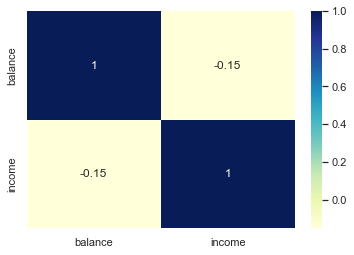

In [9]:
sns.set(rc={'figure.figsize' : (6,4)})
sns.heatmap(credData.corr(), cmap="YlGnBu", annot=True)
plt.show();

#### We can observe that there isn't much correlation between Balance and Income.

### 6.2 Pairplot to observe Correlation

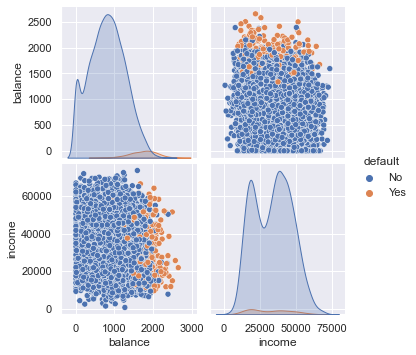

In [10]:
sns.set(rc={'figure.figsize' : (6,4)})
sns.pairplot(credData, hue='default')
plt.show();

* #### We can see from this pair plot that the Number of Defaulted credit are present when the balance is higher. There is association between balance and Defaulted credit which we can clearly observe in above plot.
* #### The defaulted loans are less in number.

### 6.3 Box Plot of `default` vs `Balance` and `Income`

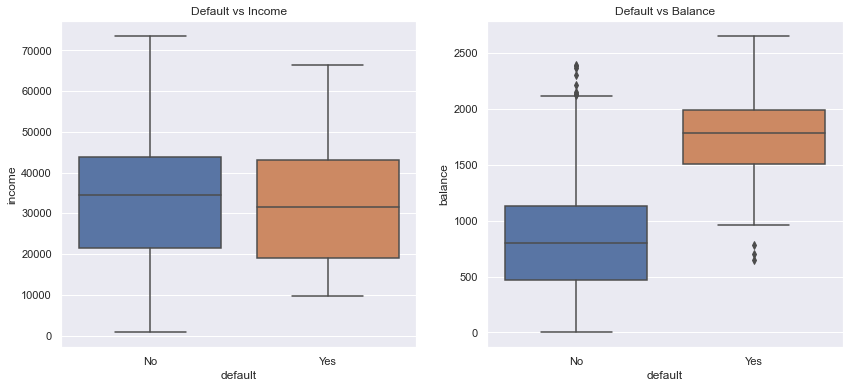

In [11]:
sns.set(rc={'figure.figsize': (14,6)})
fig, axs = plt.subplots(1, 2)
plt.subplot(1,2,1)
sns.boxplot(data=credData,x="default",y='income')
plt.title("Default vs Income")
plt.subplot(1,2,2)
sns.boxplot(data=credData,x="default",y='balance')
plt.title("Default vs Balance")
plt.show();

* __Default vs Income :__
__We can observe from the box plot that the income of defaulted credits and income of Not defaulted credit is almost in the same range. One intresting thing between Not Defaulted Loans and Defaulted Loans is that the minimum income of Not Defaulted Loan is way less than Defaulted Loan.__

* __Default vs Balance :__
__We can observe from the box plot that the Balance of defaulted credits is higher as compared to Balance of Not defaulted credit. We can say that Balance and Default are associated with each other__

### 6.4 Scatter Plot of Income vs Balance

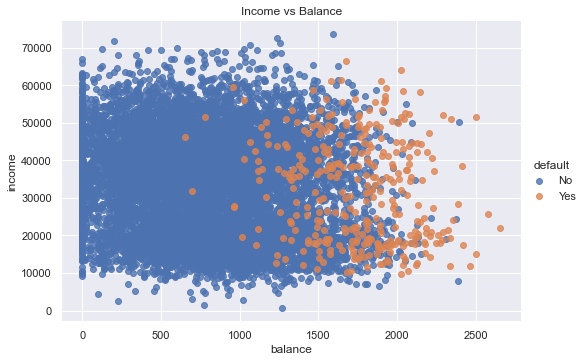

In [12]:
sns.lmplot(x='balance', y='income', hue='default',data=credData, aspect=1.5, fit_reg=False)
plt.title("Income vs Balance")
plt.show();

__In this scatter plot, All the Defaulted Credit are mostly on the higher side of the `balance` values and We have No NOT DEFAULTED CREDIT when the value of balance is below is less than 600 where as most of the DEFAULTED CREDIT lies where balance is more than 1500.__

### 7. Observe the Number of Loans defaulted and Not defaulted


In [13]:
credData.groupby('default').size()

default
No     9667
Yes     333
dtype: int64

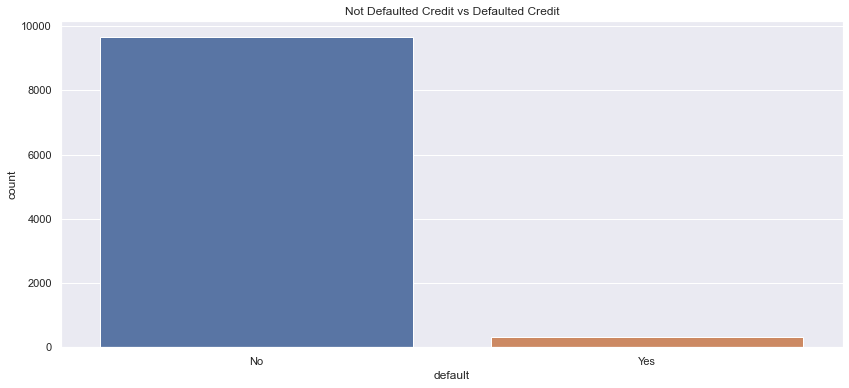

In [14]:
sns.countplot(x='default', data=credData, label='count')
plt.title("Not Defaulted Credit vs Defaulted Credit")
plt.show();

* We can see that the Number of loan defaulted is less as compared to loan Not Defaulted.
* This is a fair figure as usually in any Financial Institution the number of Loan defaulted is usually less but the __amount__ involved in those loan can be humongous.
* Number of Loan Defaulted = 333
* Number of Loan Not Defaulted = 9667

### 8. Logistic Regression Model using Validation Set Approach

In [15]:
credData.columns

Index(['default', 'student', 'balance', 'income'], dtype='object')

### 8.1 One Hot Encoding our Target Variable

In [16]:
from sklearn import preprocessing
defaultEncoding = preprocessing.LabelEncoder()
credData['default_encoded'] = defaultEncoding.fit_transform(credData['default']).astype(int)

* 0 = Loan Not Defaulted
* 1 = Loan Defaulted
* One Hot Encoding helps us to convert Categorical Value into Numerical Value.

### 8.2 Dropping `default` column from our data frame defaultData as we have encoded this column and stored into a new variable called `default_encoded`.
* We will also drop __student__ column because we don't need it in this model.

In [17]:
credData.head()

,default,student,balance,income,default_encoded
0,No,No,729.526495,44361.625074,0
1,No,Yes,817.180407,12106.134700,0
2,No,No,1073.549164,31767.138947,0
3,No,No,529.250605,35704.493935,0
4,No,No,785.655883,38463.495879,0


In [18]:
credData = credData.drop(['default','student'], axis=1)
credData.head()

,balance,income,default_encoded
0,729.526495,44361.625074,0
1,817.180407,12106.134700,0
2,1073.549164,31767.138947,0
3,529.250605,35704.493935,0
4,785.655883,38463.495879,0


### 8.3 Split the data into Training Set and Test Set

In [19]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(credData,test_size=0.2, random_state=4)

In [20]:
print("Train Set : ", train.shape)
print("Test Set : ", test.shape)

Train Set :  (8000, 3)
Test Set :  (2000, 3)


### 8.4 Fitting the Logistic Regression Model

#### 8.4.1 Logistic Regression using Validation Set Approach

In [21]:
from statsmodels.formula.api import logit

In [22]:
cred_Model = logit("default_encoded ~ balance + income", train).fit()

Optimization terminated successfully.
         Current function value: 0.079330
         Iterations 10


In [23]:
test_pred = cred_Model.predict(test)

#### 8.4.2.1  Converting probability to labels and Cut off = 0.5

In [25]:
def convert_prob_to_label(prob, cutoff = 0.5):
    label = None
    if prob > cutoff:
        label = 1
    else:
        label = 0
    return label

In [26]:
pred_labels = list(map(convert_prob_to_label, test_pred))
pred_labels = np.asarray(pred_labels)

### 8.4.3 Let's compute our Confusion Matrix, this will help us understand our model better and we can calculate misclassification rate based on it.
#### 8.4.3.1 Confusion Matrix : Confusion matrix tells more about the accuracy of our model and has 4 very important metric count.
* True negatives in the upper-left position.
* False negatives in the lower-left position.
* False positives in the upper-right position.
* True positives in the lower-right position.

In [27]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(test.default_encoded, pred_labels)
print(conf_matrix)
print("True Negative :",conf_matrix[0,0])
print("True Positive :",conf_matrix[1,1])
print("False Positive :",conf_matrix[0,1])
print("False Negative :",conf_matrix[1,0])

[[1924    7]
 [  42   27]]
True Negative : 1924
True Positive : 27
False Positive : 7
False Negative : 42


#### 8.4.3.2 Heatmap of Confusion Matrix

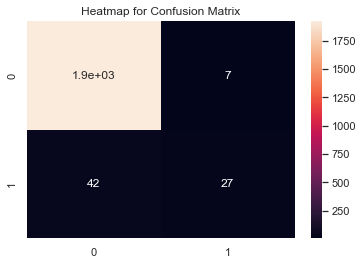

In [28]:
sns.set(rc={'figure.figsize' : (6,4)})
sns.heatmap(conf_matrix, annot=True)
plt.title("Heatmap for Confusion Matrix")
plt.show();

* True Negative value of 1924 suggests that around 1924 times real value said the __CREDIT was NOT DEFAULTED__ and value predicted by model also said __CREDIT was NOT DEFAULTED__.
* True Positive value of 27 says that around 27 times real value said __CREDIT is DEFAULTED__ and value predicted by model also said __CREDIT is DEFAULTED__.
* False positive value of 7 means when model predicted the __CREDIT is DEFAULTED__ but in real the __CREDIT was NOT DEFAULTED__.
* False negative value of 42 means when model predicted __CREDIT is NOT DEFAULTED__ but in real __CREDIT was DEFAULTED__.

#### 8.4.3.3 Heatmap of percentage of Data present in Each Quadrant

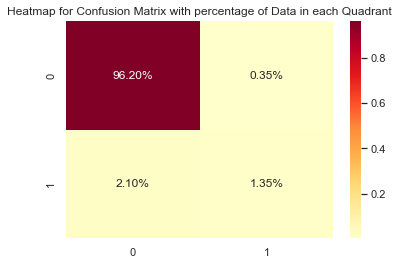

In [29]:
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt='.2%',cmap='YlOrRd')
plt.title("Heatmap for Confusion Matrix with percentage of Data in each Quadrant")
plt.show();

__In Validation Set, the data present was only 20%. Out of 20%, 96.20 % of data lies in True Negative quadrant which is "Not Defaulted" prediction and only 1.35% data lies in True Positive Quadrant which is "Defaulted Quadrant". The type2 Error which is 2.10% is also high which means model was in inefficient in predicting Defaulted Credit data.__

### 9. Misclassification Rate
* It tells you what fraction of predictions were incorrect. It's also called Classification Error.
* Misclassification Rate(MR) is given by :

$$ MR = \frac{(False Positive + False Negative)}{(True Positive + True negative + False Positive + False Negative)}$$

In [30]:
misclassification_Rate = (conf_matrix[0,1] + conf_matrix[1,0])/(conf_matrix[0,0] + conf_matrix[1,1] + conf_matrix[0,1] + conf_matrix[1,0])
print("Misclassification Rate using Validation Test Approach is : {0} %".format(misclassification_Rate*100))

Misclassification Rate using Validation Test Approach is : 2.45 %


__We got a good model to start with as the misclassification rate is just 2.45 %. However, The range of Defaulted Credit is very less in our dataset. The defaulted credit is 333 columns. It is crucial to know that How accurate this model will be while predicting DEFAULTED CREDIT. Although, Heatmaps and Confusion matrix above suggests that this model performs well while predicting <i>Not Defaulted Credit</i> but doesn't performs well while predicting <i>Defaulted Credit</i>.__

### 10 Fit Logistic Regression Model with different splits of the observations into a training set and a validation set
### 10.1 Logistic Regression Model 1
#### 10.1.1 Creating 3 different splits of observations 

In [31]:
train1,test1 = train_test_split(credData,test_size=0.3, random_state=19)
train2,test2 = train_test_split(credData,test_size=0.25, random_state=2)
train3,test3 = train_test_split(credData,test_size=0.35, random_state=10)

#### 10.1.2 Fitting Logistic Regression Model with train1, test1

In [32]:
model1 = logit("default_encoded ~ balance + income", train1).fit()

Optimization terminated successfully.
         Current function value: 0.081604
         Iterations 10


In [33]:
test1_pred = model1.predict(test1)

#### 10.1.3 Converting probability to labels and Cut off = 0.5

In [34]:
def convert_prob_to_label(prob, cutoff = 0.5):
    label = None
    if prob > cutoff:
        label = 1
    else:
        label = 0
    return label

In [35]:
test1_pred_labels = list(map(convert_prob_to_label, test1_pred))
test1_pred_labels = np.asarray(test1_pred_labels)

#### 10.1.4 Confusion Matrix

In [36]:
from sklearn.metrics import confusion_matrix
conf_matrix_model1 = confusion_matrix(test1.default_encoded, test1_pred_labels)
print(conf_matrix_model1)
print("True Negative :",conf_matrix_model1[0,0])
print("True Positive :",conf_matrix_model1[1,1])
print("False Positive :",conf_matrix_model1[0,1])
print("False Negative :",conf_matrix_model1[1,0])

[[2903   11]
 [  63   23]]
True Negative : 2903
True Positive : 23
False Positive : 11
False Negative : 63


__Model 1 : In Model 1 the split between Train Data and Validation Test data is 70% and 30% respectively. When we use Model 1 to make predictions on test1 Data, the model does an incredible job in classifying Not Defaulted Credit, however when it comes down to predicting Defaulted Credit the model1 doesn't performs well. We can observe that from a False Negative value of 63 which is also known as Type 2 Error. The reason our Model is not able to predict Large amount of Defaulted Credit can be because we have very few Data Points to train our Model based on Defaulted Credit data.__

### 10.2 Logistic Regression Model 1
#### 10.2.1 Fitting Logistic Regression Model with train2, test2

In [37]:
model2 = logit("default_encoded ~ balance + income", train2).fit()

Optimization terminated successfully.
         Current function value: 0.080776
         Iterations 10


In [38]:
test2_pred = model2.predict(test2)

#### 10.2.2 Converting probability to labels and Cut off = 0.5

In [39]:
test2_pred_labels = list(map(convert_prob_to_label, test2_pred))
test2_pred_labels = np.asarray(test2_pred_labels)

#### 10.2.3 Confusion Matrix

In [40]:
from sklearn.metrics import confusion_matrix
conf_matrix_model2 = confusion_matrix(test2.default_encoded, test2_pred_labels)
print(conf_matrix_model2)
print("True Negative :",conf_matrix_model2[0,0])
print("True Positive :",conf_matrix_model2[1,1])
print("False Positive :",conf_matrix_model2[0,1])
print("False Negative :",conf_matrix_model2[1,0])

[[2416   17]
 [  47   20]]
True Negative : 2416
True Positive : 20
False Positive : 17
False Negative : 47


__Model 2 : In Model 2 the split between Train Data and Validation Test data is 75% and 25% respectively. When we use Model 2 to make predictions on test2 Data, the model classifies Not Defaulted Credit value as we can see True Negative value which is 2416, however when it comes down to predicting Defaulted Credit the Model 2 performs the same as previous model. We can observe that from a False Negative value of 47. Few Defaulted Credit data points available in the dataset might be the reason behind Model 2 being inefficient on predicting Defaulted Credit data__

### 10.3 Logistic Regression Model 3
#### 10.3.1 Fitting Logistic Regression Model with train3, test3

In [41]:
model3 = logit("default_encoded ~ balance + income", train3).fit()

Optimization terminated successfully.
         Current function value: 0.074489
         Iterations 10


In [42]:
test3_pred = model3.predict(test3)

#### 10.3.2 Converting probability to labels and Cut off = 0.5

In [43]:
test3_pred_labels = list(map(convert_prob_to_label, test3_pred))
test3_pred_labels = np.asarray(test3_pred_labels)

#### 10.3.3 Confusion Matrix

In [44]:
from sklearn.metrics import confusion_matrix
conf_matrix_model3 = confusion_matrix(test3.default_encoded, test3_pred_labels)
print(conf_matrix_model3)
print("True Negative :",conf_matrix_model3[0,0])
print("True Positive :",conf_matrix_model3[1,1])
print("False Positive :",conf_matrix_model3[0,1])
print("False Negative :",conf_matrix_model3[1,0])

[[3361   12]
 [  88   39]]
True Negative : 3361
True Positive : 39
False Positive : 12
False Negative : 88


__Model 3 : We can see that we are getting almost same results with every model. In Model 3 the split of training data was 65% and test data was 35%. And thus the value went up. The inability in Models to predict Defaulted Credit Data is due to the insufficient Defaulted Credit data points present in the Dataset.__

### 11. Building and Fitting a New Logistic Regression Model by taking a Dummy Variable of Student column

In [45]:
credData = pd.read_csv('default.csv')
credData.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


#### 11.1 Generating Dummy Variables for student

In [46]:
credDummies = pd.get_dummies(credData.student, prefix='student')
credDummies.drop(credDummies.columns[0], axis=1, inplace=True)
credData = pd.concat([credData, credDummies], axis=1)
credData.head()

,default,student,balance,income,student_Yes
0,No,No,729.526495,44361.625074,0
1,No,Yes,817.180407,12106.134700,1
2,No,No,1073.549164,31767.138947,0
3,No,No,529.250605,35704.493935,0
4,No,No,785.655883,38463.495879,0


#### 11.2 Replacing No with 0 and Yes with 1 in default column

In [47]:
credData = credData.replace({'default' : {'No':0,'Yes':1}})

#### 11.3 Fitting the Logistic Regression Model using Student Dummy Variable

In [48]:
train,test = train_test_split(credData,test_size=0.2, random_state=10)

In [49]:
model = logit('default ~ balance + income + student_Yes',train).fit()

Optimization terminated successfully.
         Current function value: 0.076452
         Iterations 10


In [50]:
test_pred = model.predict(test)

#### 11.4 Converting probability to labels and Cut off = 0.5

In [51]:
pred_labels = list(map(convert_prob_to_label, test_pred))
pred_labels = np.asarray(pred_labels)

#### 11.5 Confusion Matrix

In [52]:
from sklearn.metrics import confusion_matrix
conf_matrix_model = confusion_matrix(test.default, pred_labels)
print(conf_matrix_model)
print("True Negative :",conf_matrix_model[0,0])
print("True Positive :",conf_matrix_model[1,1])
print("False Positive :",conf_matrix_model[0,1])
print("False Negative :",conf_matrix_model[1,0])

[[1927    5]
 [  49   19]]
True Negative : 1927
True Positive : 19
False Positive : 5
False Negative : 49


#### 11.6 Misclassification Rate in this model
* It tells you what fraction of predictions were incorrect. It's also called Classification Error.
* Misclassification Rate(MR) is given by :

$$ MR = \frac{(False Positive + False Negative)}{(True Positive + True negative + False Positive + False Negative)}$$

In [53]:
misclassificationRate = (conf_matrix_model[0,1] + conf_matrix_model[1,0])/(conf_matrix_model[0,0] + conf_matrix_model[1,1] + conf_matrix_model[0,1] + conf_matrix_model[1,0])
print("Misclassification Rate using Validation Test Approach is : {0} %".format(misclassificationRate*100))

Misclassification Rate using Validation Test Approach is : 2.7 %


__The Misclassification Rate in our very first Model was 2.45 % (9) and the Missclassification Rate in this model is also 2.7 % which suggests that Dummy variable of student has not played any role in the model. ALthough the split in Training Set and Testing Set is same in both the models with different random state.__ 

__Therefore, We can conclude that All the Logistic Regression Models which we observed for this Dataset were incapable of predicting the Defaulted Credit at a Large Scale and this incapability can be due to very few Data points available to us in the Dataset in terms of Default Credit. All model do an incredible job in predicting Not Defaulted Credit.__